In [156]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import re
import geopandas as gpd
from shapely.geometry import Point
import shapely

### Part 1 - Data Gathering using APIs

In [157]:
offense_type = "offense_description=BURGLARY- AGGRAVATED"
date_range = "$where=incident_reported between '2022-01-01T00:00:00' and '2022-09-30T23:59:59'"
endpoint = f'https://data.nashville.gov/resource/2u6v-ujjs.json?{offense_type}&{date_range}&$limit=25000'
response = requests.get(endpoint)

In [158]:
response

<Response [200]>

In [159]:
response.text

'[{"primary_key":"20220167824_11","incident_number":"20220167824","report_type":"D","report_type_description":"DISPATCHED","incident_status_code":"O","incident_status_description":"OPEN","investigation_status":"Open","incident_occurred":"2022-04-07T15:00:00.000","incident_reported":"2022-04-08T11:52:00.000","incident_location":"JACKSON ST","latitude":"36.17","longitude":"-86.8","location_code":"22","location_description":"RESIDENCE, HOME","offense_number":"1","offense_nibrs":"220","offense_description":"BURGLARY- AGGRAVATED","weapon_primary":"16","weapon_description":"Unarmed","victim_number":"1","domestic_related":false,"victim_type":"I","victim_description":"INDIVIDUAL (18 AND OVER)","victim_gender":"U","victim_race":"W","victim_ethnicity":"Non-Hispanic","victim_county_resident":"NON RESIDENT","mapped_location":{"type":"Point","coordinates":[-86.8,36.17]}}\n,{"primary_key":"20220126184_31","incident_number":"20220126184","report_type":"D","report_type_description":"DISPATCHED","incid

In [160]:
agg_burglary_data = response.json()

In [161]:
agg_burglary_data_df = pd.DataFrame(agg_burglary_data)

In [162]:
agg_burglary_data_df

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_type,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,I,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN
4,20220010799_11,20220010799,D,DISPATCHED,O,OPEN,Open,2021-12-06T12:00:00.000,2022-01-21T16:25:00.000,SOUTH ST,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",6805,815,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,20220417748_11,20220417748,D,DISPATCHED,O,OPEN,Open,2022-08-22T05:40:00.000,2022-08-22T21:24:00.000,PENN MEADE WAY,...,I,INDIVIDUAL (18 AND OVER),F,U,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.7, 36.24]}",NaN,NaN,NaN
1364,20220462314_11,20220462314,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-13T17:00:00.000,2022-09-15T02:04:00.000,1524 1524,...,I,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.744, 36....",NaN,NaN,37206
1365,20220397543_11,20220397543,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-08-11T18:00:00.000,2022-08-11T22:47:00.000,930 930,...,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.835, 36....",NaN,NaN,37209
1366,20220487005_11,20220487005,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-27T19:16:00.000,2022-09-27T22:46:00.000,400 400,...,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.794, 36....",NaN,NaN,37207


In [163]:
type(agg_burglary_data_df['mapped_location'])

pandas.core.series.Series

In [164]:
census_tracts = pd.read_csv('../api_project-malted_milk_balls/Data/census_tracts.csv')

In [165]:
census_tract_shapes = gpd.read_file('../api_project-malted_milk_balls/tl_2020_47_tract/tl_2020_47_tract.shp')

<AxesSubplot: >

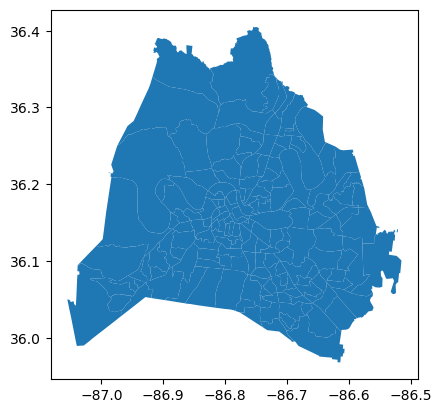

In [166]:
census_tract_shapes[census_tract_shapes['COUNTYFP']=='037'].plot()

In [167]:
davidson_county = census_tract_shapes[census_tract_shapes['COUNTYFP']=='037']

In [168]:
def coord_grabber(string):
    list = re.findall(r'\[([^]]+)\]', string)
    if len(list) == 1:
        return list[0]
    else:
        return list

In [169]:
test = agg_burglary_data_df['mapped_location']
coordinates = []

for elem in test:
    c = str(elem)
    coord = coord_grabber(c)
    coordinates.append(coord)

In [170]:
from numpy import NaN

In [171]:
x = []
y = []
for string in coordinates:
    if type(string) == str:
        x.append(string.split(',')[0])
        y.append(string.split(',')[1])
    else:
        x.append(NaN)
        y.append(NaN)

In [172]:
agg_burglary_data_df['lat'] = y
agg_burglary_data_df['lng'] = x

In [173]:
agg_burglary_data_df[['lat', 'lng']].astype(float)

,lat,lng
0,36.170,-86.800
1,36.130,-86.770
2,36.040,-86.660
3,36.130,-86.860
4,36.150,-86.780
...,...,...
1363,36.240,-86.700
1364,36.194,-86.744
1365,36.160,-86.835
1366,36.214,-86.794


In [174]:
agg_burglary_data_df['geometry'] = gpd.points_from_xy(agg_burglary_data_df['lng'], agg_burglary_data_df['lat'])

agg_burglary_data_df

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code,lat,lng,geometry
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN,36.17,-86.8,POINT (-86.80000 36.17000)
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN,36.13,-86.77,POINT (-86.77000 36.13000)
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN,36.04,-86.66,POINT (-86.66000 36.04000)
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN,36.13,-86.86,POINT (-86.86000 36.13000)
4,20220010799_11,20220010799,D,DISPATCHED,O,OPEN,Open,2021-12-06T12:00:00.000,2022-01-21T16:25:00.000,SOUTH ST,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.78, 36.15]}",6805,815,NaN,36.15,-86.78,POINT (-86.78000 36.15000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,20220417748_11,20220417748,D,DISPATCHED,O,OPEN,Open,2022-08-22T05:40:00.000,2022-08-22T21:24:00.000,PENN MEADE WAY,...,U,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.7, 36.24]}",NaN,NaN,NaN,36.24,-86.7,POINT (-86.70000 36.24000)
1364,20220462314_11,20220462314,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-13T17:00:00.000,2022-09-15T02:04:00.000,1524 1524,...,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.744, 36....",NaN,NaN,37206,36.194,-86.744,POINT (-86.74400 36.19400)
1365,20220397543_11,20220397543,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-08-11T18:00:00.000,2022-08-11T22:47:00.000,930 930,...,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.835, 36....",NaN,NaN,37209,36.16,-86.835,POINT (-86.83500 36.16000)
1366,20220487005_11,20220487005,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,2022-09-27T19:16:00.000,2022-09-27T22:46:00.000,400 400,...,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.794, 36....",NaN,NaN,37207,36.214,-86.794,POINT (-86.79400 36.21400)


In [175]:
type(agg_burglary_data_df)

pandas.core.frame.DataFrame

In [176]:
burglary_geo = gpd.GeoDataFrame(agg_burglary_data_df, 
                           crs = davidson_county.crs, 
                           geometry = agg_burglary_data_df['geometry'])

In [177]:
burg_by_tract = gpd.sjoin(burglary_geo, davidson_county, predicate = 'within')

In [178]:
drop_dupes = burg_by_tract.drop_duplicates(subset=['incident_number'], keep='first')
drop_dupes

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
147,20220285055_11,20220285055,D,DISPATCHED,O,OPEN,Open,2022-06-04T13:17:00.000,2022-06-09T13:17:00.000,IRELAND ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
189,20220059646_11,20220059646,D,DISPATCHED,O,OPEN,Open,2022-02-08T21:00:00.000,2022-02-08T22:49:00.000,14TH AVE N,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
252,20220070314_11,20220070314,D,DISPATCHED,O,OPEN,Open,2022-02-15T05:00:00.000,2022-02-15T11:10:00.000,IRELAND ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
353,20220206351_22,20220206351,D,DISPATCHED,O,OPEN,Open,2022-04-27T22:00:00.000,2022-04-28T09:28:00.000,IRELAND ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,20220452742_11,20220452742,D,DISPATCHED,O,OPEN,Open,2022-09-09T10:00:00.000,2022-09-09T23:51:00.000,RICE RD,...,015626,47037015626,156.26,Census Tract 156.26,G5020,S,3393771,0,+36.0722871,-086.6476413
1088,20220161370_11,20220161370,D,DISPATCHED,O,OPEN,Open,2022-04-05T13:15:00.000,2022-04-05T14:45:00.000,COOPER LN,...,011500,47037011500,115,Census Tract 115,G5020,S,3599286,135840,+36.2018066,-086.7127035
1262,20220472518_11,20220472518,D,DISPATCHED,O,OPEN,Open,2022-09-20T00:30:00.000,2022-09-20T22:43:00.000,RIVERSIDE DR,...,011500,47037011500,115,Census Tract 115,G5020,S,3599286,135840,+36.2018066,-086.7127035
1302,20220480927_11,20220480927,D,DISPATCHED,O,OPEN,Open,2022-09-23T19:00:00.000,2022-09-24T22:03:00.000,NaN,...,011500,47037011500,115,Census Tract 115,G5020,S,3599286,135840,+36.2018066,-086.7127035


In [179]:
drop_dupes['TRACTCE'] = drop_dupes['TRACTCE'].astype('int64')

C:\Users\Pupnsuds90\anaconda3\envs\geospatial_ds6\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [180]:
tract_merge = pd.merge(drop_dupes, census_tracts, how='inner')
tract_merge

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,ALAND,AWATER,INTPTLAT,INTPTLON,Unnamed: 0,Name,Population,state,county,median_income
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,1080635,0,+36.1669323,-086.8036511,81,"Census Tract 142, Davidson County, Tennessee",2072,47,37,24237
1,20220285055_11,20220285055,D,DISPATCHED,O,OPEN,Open,2022-06-04T13:17:00.000,2022-06-09T13:17:00.000,IRELAND ST,...,1080635,0,+36.1669323,-086.8036511,81,"Census Tract 142, Davidson County, Tennessee",2072,47,37,24237
2,20220059646_11,20220059646,D,DISPATCHED,O,OPEN,Open,2022-02-08T21:00:00.000,2022-02-08T22:49:00.000,14TH AVE N,...,1080635,0,+36.1669323,-086.8036511,81,"Census Tract 142, Davidson County, Tennessee",2072,47,37,24237
3,20220070314_11,20220070314,D,DISPATCHED,O,OPEN,Open,2022-02-15T05:00:00.000,2022-02-15T11:10:00.000,IRELAND ST,...,1080635,0,+36.1669323,-086.8036511,81,"Census Tract 142, Davidson County, Tennessee",2072,47,37,24237
4,20220206351_22,20220206351,D,DISPATCHED,O,OPEN,Open,2022-04-27T22:00:00.000,2022-04-28T09:28:00.000,IRELAND ST,...,1080635,0,+36.1669323,-086.8036511,81,"Census Tract 142, Davidson County, Tennessee",2072,47,37,24237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,20220452742_11,20220452742,D,DISPATCHED,O,OPEN,Open,2022-09-09T10:00:00.000,2022-09-09T23:51:00.000,RICE RD,...,3393771,0,+36.0722871,-086.6476413,105,"Census Tract 156.26, Davidson County, Tennessee",7357,47,37,50283
1033,20220161370_11,20220161370,D,DISPATCHED,O,OPEN,Open,2022-04-05T13:15:00.000,2022-04-05T14:45:00.000,COOPER LN,...,3599286,135840,+36.2018066,-086.7127035,56,"Census Tract 115, Davidson County, Tennessee",3646,47,37,60438
1034,20220472518_11,20220472518,D,DISPATCHED,O,OPEN,Open,2022-09-20T00:30:00.000,2022-09-20T22:43:00.000,RIVERSIDE DR,...,3599286,135840,+36.2018066,-086.7127035,56,"Census Tract 115, Davidson County, Tennessee",3646,47,37,60438
1035,20220480927_11,20220480927,D,DISPATCHED,O,OPEN,Open,2022-09-23T19:00:00.000,2022-09-24T22:03:00.000,NaN,...,3599286,135840,+36.2018066,-086.7127035,56,"Census Tract 115, Davidson County, Tennessee",3646,47,37,60438


In [181]:
tract_merge.to_csv('tract_merge.csv')